In [ ]:
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings

In [ ]:
df =pd.read_csv("JPMorgan Chase (2023 - 02.05.2024).csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,135.240005,136.740005,133.889999,135.119995,129.648499,11054800
1,2023-01-04,135.990005,137.679993,135.570007,136.380005,130.857483,11687600
2,2023-01-05,135.660004,135.710007,133.699997,135.350006,130.828491,8381300
3,2023-01-06,136.130005,138.380005,134.490005,137.940002,133.331955,10029100
4,2023-01-09,138.600006,138.880005,136.880005,137.369995,132.781006,8482300
...,...,...,...,...,...,...,...
329,2024-04-25,192.250000,193.940002,191.179993,193.369995,193.369995,9802300
330,2024-04-26,193.570007,194.869995,193.059998,193.490005,193.490005,6413700
331,2024-04-29,193.479996,194.259995,192.429993,193.279999,193.279999,5387800
332,2024-04-30,192.809998,194.990005,191.639999,191.740005,191.740005,8153700


In [ ]:
#pendapatan penjulan JPmorgan
import plotly.express as px
figure = px.line(df, x="Date", y="Adj Close", title="Pendaptan penjualan JPmorgan kuartal")
figure.show()

<Figure size 640x480 with 0 Axes>

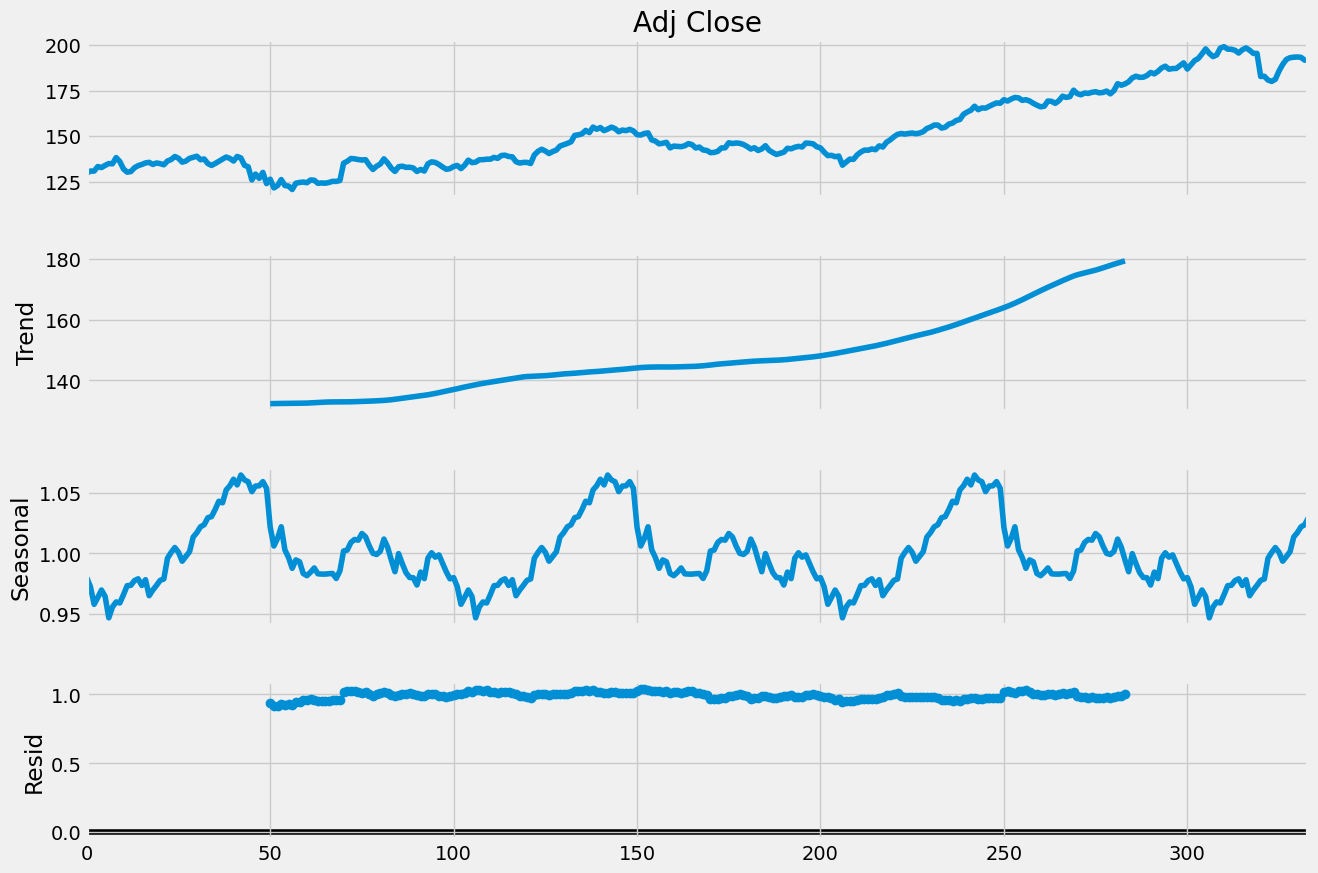

In [ ]:
#pendaptan sifatnya musiman dan naik turun , kategori seaonal
#cek grafik
result = seasonal_decompose(df["Adj Close"], model='multiplicative', period=100)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

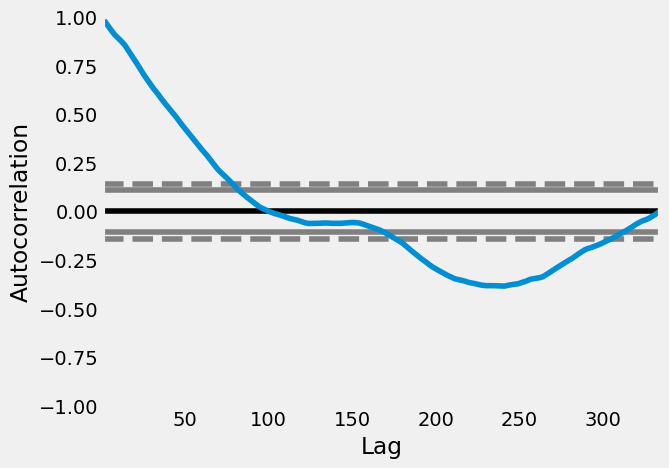

In [ ]:
#jelas menggunakan seasonal ARIMA (musiman)
#maka menentukan d = 1
# mencari p dan q
#mencari nilai p dengan autocorelation
pd.plotting.autocorrelation_plot(df["Adj Close"])

In [ ]:
d = 1 #karena seasonal
p = 6 #karena ada 6 garis di lewati hingga naik

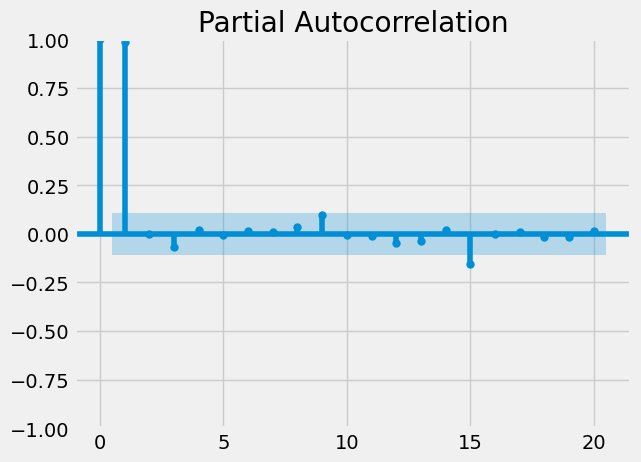

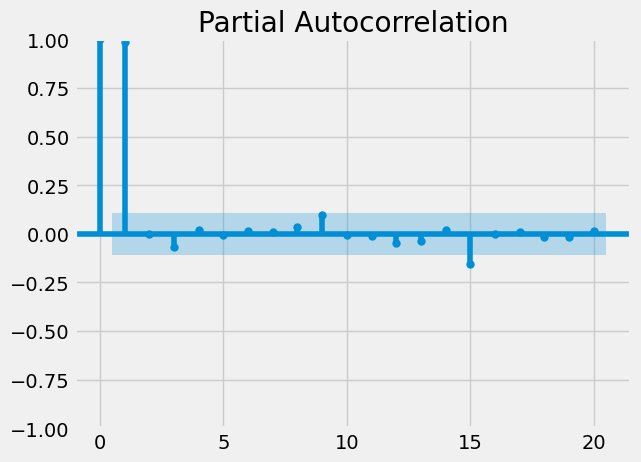

In [ ]:
#mencari nilai q menggunakan autocorellation partial
plot_pacf(df["Adj Close"], lags =20)
#20 lebar sumbu x

In [ ]:
q = 2 #ada 2 garis terjauh

In [ ]:
#membuat model
#12 month
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
model = sm.tsa.statespace.SARIMAX(df["Adj Close"],
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  334
Model:             SARIMAX(6, 1, 2)x(6, 1, 2, 12)   Log Likelihood                -658.188
Date:                            Sun, 09 Jun 2024   AIC                           1350.375
Time:                                    12:11:54   BIC                           1414.490
Sample:                                         0   HQIC                          1375.975
                                            - 334                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3379      0.198     -6.764      0.000      -1.726      -0.950
ar.L2         -0.6117      0.226   

In [ ]:
#menentukan prediksi pendapatan JPMorgan 8 kuartal ke depan
predictions = model.predict(len(df), len(df)+7)
print(predictions)

334    191.963859
335    191.950857
336    191.964715
337    192.218204
338    193.026609
339    193.247011
340    193.871240
341    194.231661
Name: predicted_mean, dtype: float64


<Axes: >

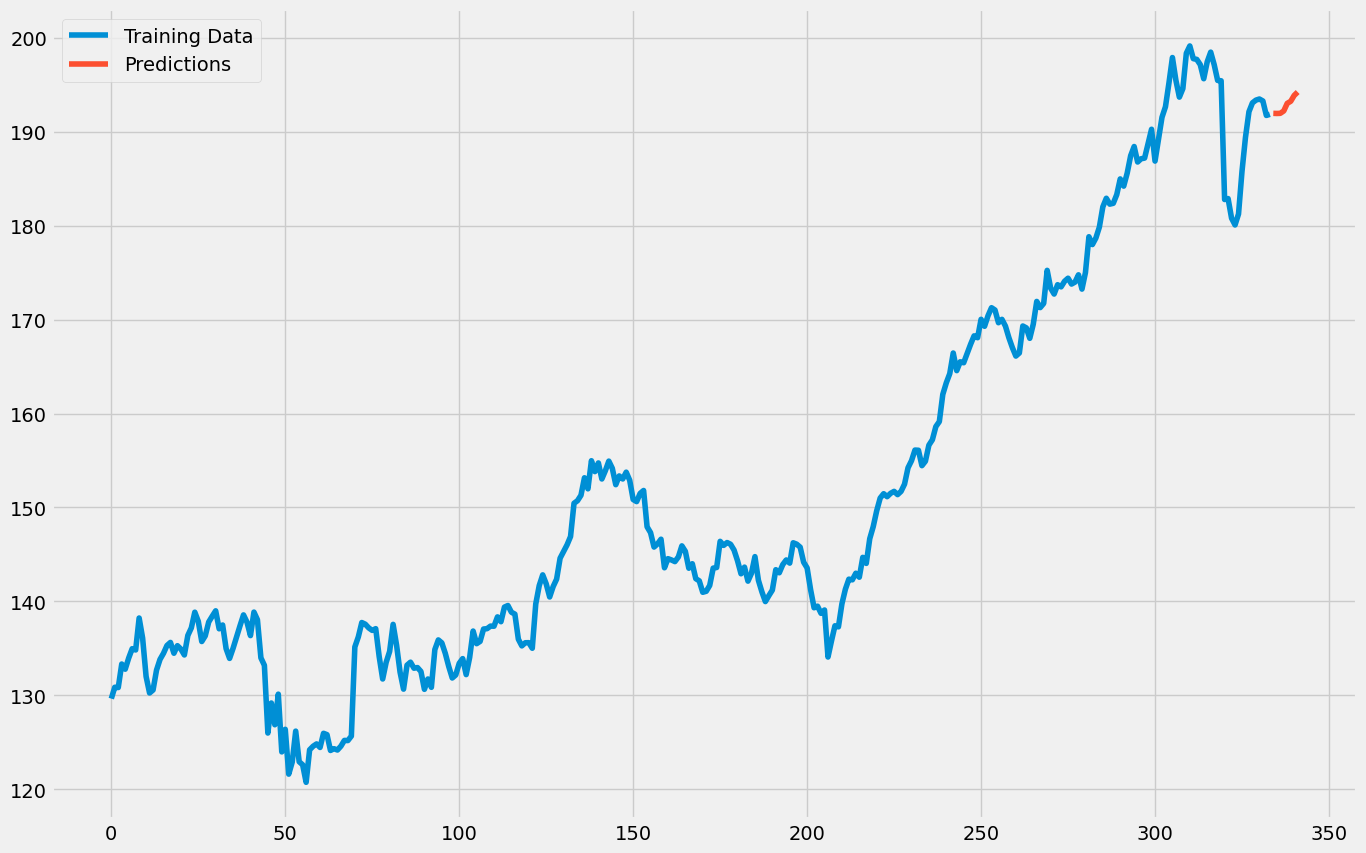

In [ ]:
#grafik prediction
df["Adj Close"].plot(legend=True,
                     label="Training Data",
                     figsize=(15,10))
predictions.plot(legend=True, label="Predictions")